In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this section, we will look at comparing the lyrical nature of songs with their respective popularity. Two columns in the dataset are of interest to us, speechiness, which indicates from 0 to 1 how much speech exists in a track, where 1 is exclusively speech content, e./g and audiobook, whereas 0 is a track that contains no speech. We also want to look at instrumentality, which describes if a track contains vocal lyrics of is purely instrumental. We will also include some potentially related columns such as genre and explicitness, e.g. to see if certain genres prefer instrumental songs 

In [64]:
df = pd.read_csv('tracks.csv')

In [65]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [66]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


In [67]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


Lets begin with a brief look at a heatmap between our different numerical columns. We can see some correlations forming between speechiness and explicit, which seems fairly obvious. We also see a slight correlation between popularity and instrumentalness, which maybe an interesting point to look at. 

<Axes: >

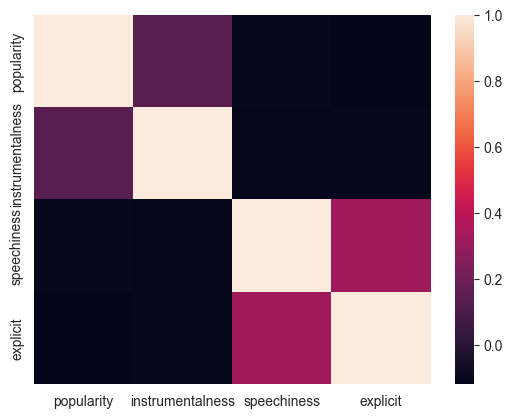

In [68]:
df = df[["popularity", "instrumentalness", "speechiness", "explicit", "track_genre"]]
sns.heatmap(df.corr(numeric_only=True))

We can now look at some graphs for our columns

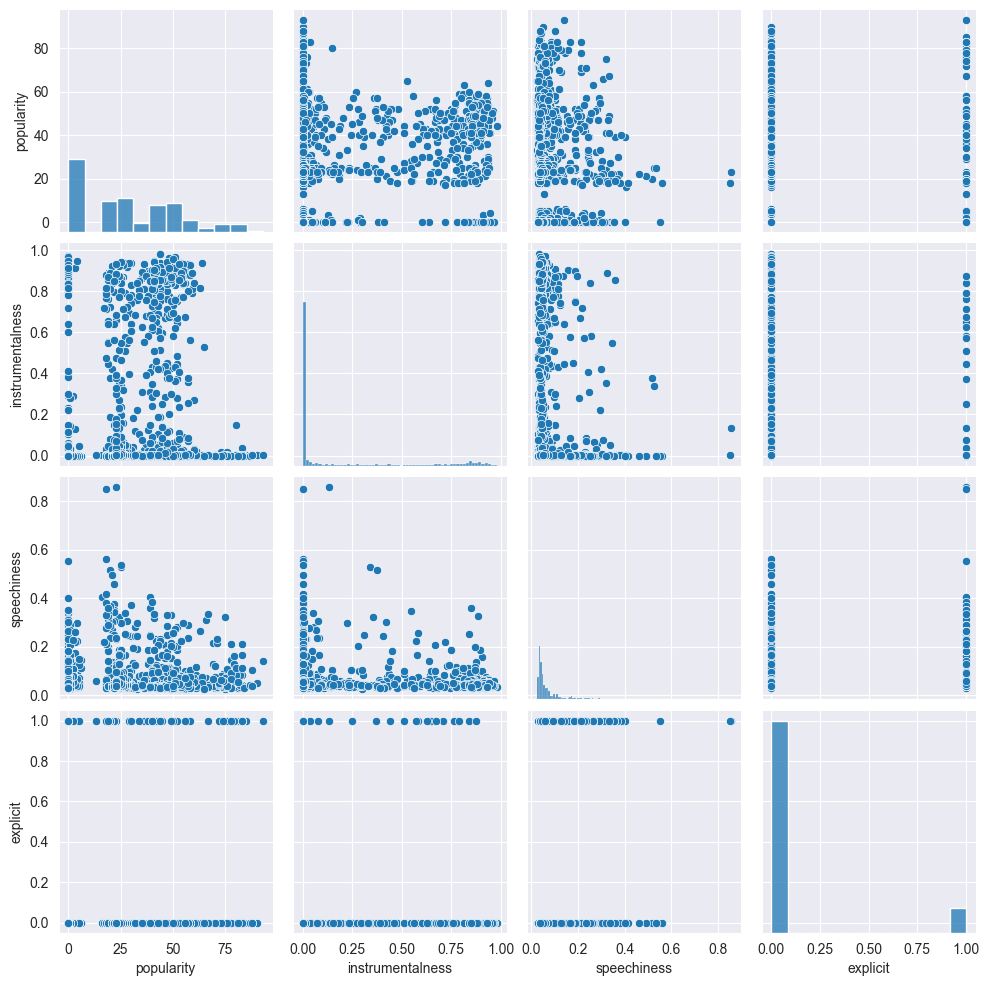

In [69]:
sns.pairplot(df)

In [70]:
df["explicit"].value_counts()

explicit
False    1343
True      157
Name: count, dtype: int64

Instrumentalness seems to have a heavy left skew, with a few outliers. indicating that most songs have some vocal presence in them. 

<Axes: >

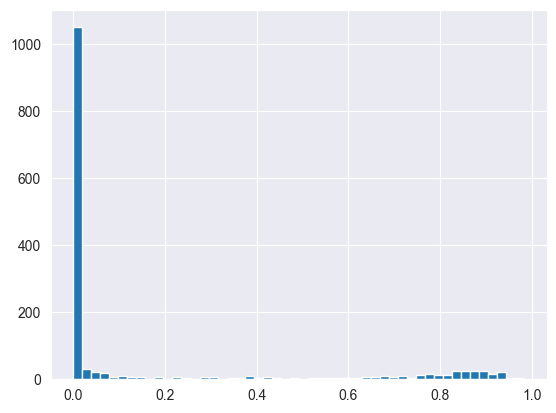

In [71]:
df["instrumentalness"].hist(bins=50)

Speechiness has the same trend, a heavy left skew with some outliers, meaning that most songs do not contain raw speech in them. No songs have a speechiness of 1, meaning all tracks are atleast somewhat instrumental, however some tracks have very high speechiness scores, up at 0.9, indicating very little musical content. 

<Axes: >

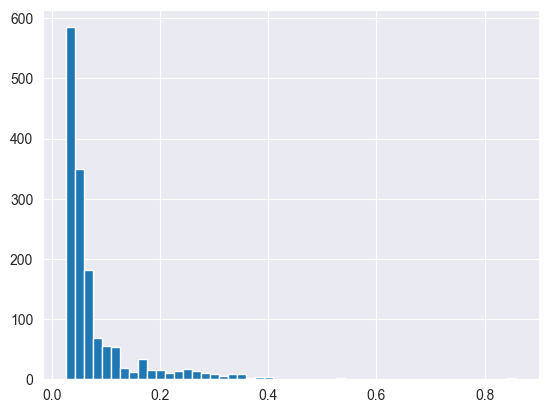

In [72]:
df["speechiness"].hist(bins=50)

We can make a boxplot of the two columns which further confirms our previous findings. Both columns have very low median scores and interquartile ranges, with numerous outliers.

<Axes: >

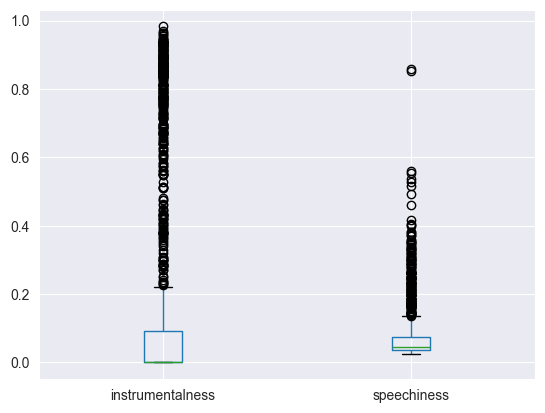

In [73]:
df.boxplot(column=["instrumentalness", "speechiness"])

We can split the boxplots by genre to get a more detailed breakdown. All genres are similar for speechiness, having low IQR and medians with a few outliers. For Instrumentalness, the different genres start to diverge in their behavior. The club column has a very large IQR, with a low median value. This tells us that the club genre is very skewed in both directions, having either very low instrumental values or very high. The dance genre is basically all instrumental , and opera is mostly instrumental with quite a few outliers. 

instrumentalness    0.008038
dtype: float64

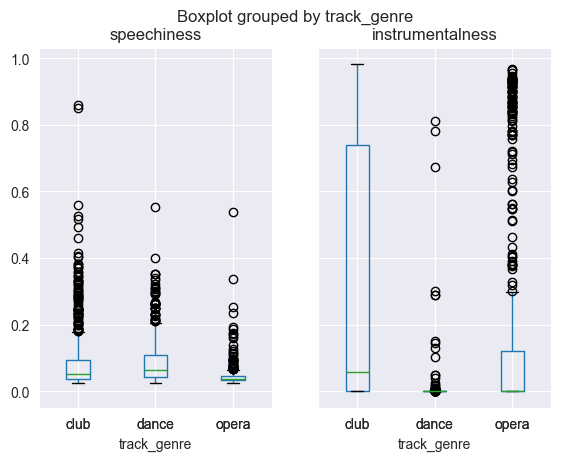

In [74]:
df.boxplot(column=["speechiness", "instrumentalness"], by="track_genre")
df[df['track_genre'] == 'dance'][['instrumentalness']].mean()

We can create some regressions fits for the above data to see if any correlations exist between the genres, speechiness and instrumentalness, and popularity. 

In [75]:
df_club = df[df["track_genre"] == "club"]
df_dance = df[df["track_genre"] == "dance"]
df_opera = df[df["track_genre"] == "opera"]

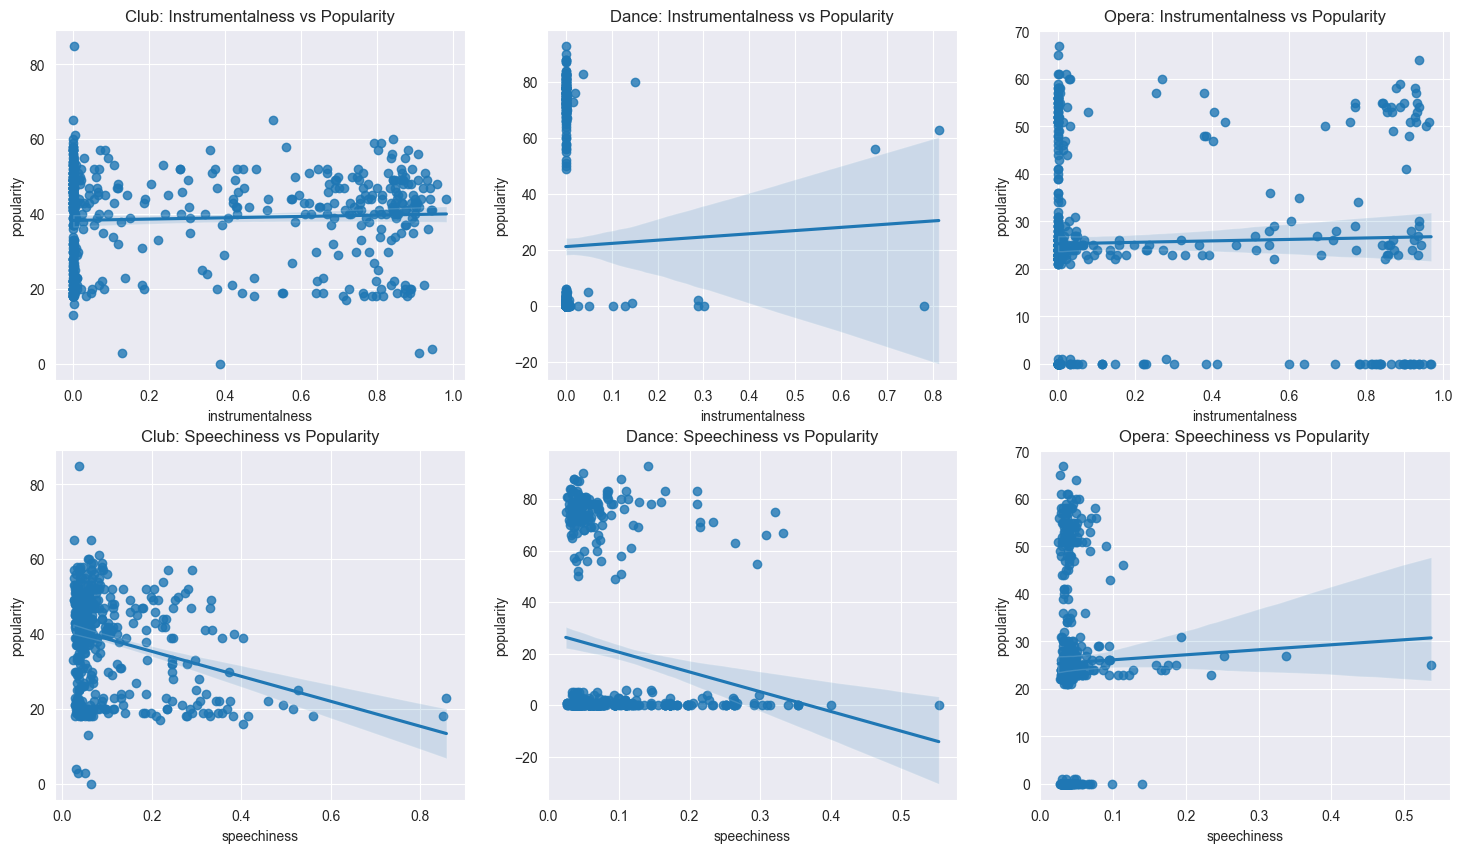

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.regplot(ax=axes[0, 0], x='instrumentalness', y='popularity', data=df_club)
axes[0, 0].set_title('Club: Instrumentalness vs Popularity')

sns.regplot(ax=axes[0, 1], x='instrumentalness', y='popularity', data=df_dance)
axes[0, 1].set_title('Dance: Instrumentalness vs Popularity')

sns.regplot(ax=axes[0, 2], x='instrumentalness', y='popularity', data=df_opera)
axes[0, 2].set_title('Opera: Instrumentalness vs Popularity')


sns.regplot(ax=axes[1, 0], x='speechiness', y='popularity', data=df_club)
axes[1, 0].set_title('Club: Speechiness vs Popularity')

sns.regplot(ax=axes[1, 1], x='speechiness', y='popularity', data=df_dance)
axes[1, 1].set_title('Dance: Speechiness vs Popularity')

sns.regplot(ax=axes[1, 2], x='speechiness', y='popularity', data=df_opera)
axes[1, 2].set_title('Opera: Speechiness vs Popularity')

plt.show()

From the above we can see some correlations forming. In the club and dance genres, there is some slight negative correlations between speechiness and popularity. We can maybe utilise this knowledge later on in our classification section.